# Bloco de Respostas C.2

### QUESTÃO A
> A metodologia é explicada na forma de comentários ao longo do notebook

### QUESTÃO B
> As diferentes cores nas bolhas do gráfico representam os diferentes continentes: 
>> **Ásia, Europa, África, Américas e Oceânia** 

> Para definirmos cores diferentes para cada continente, o processo foi:
> ### `data['continent']=pd.Categorical(data['continent'])`
_Agrupar os diferentes continentes em categorias, codificando-os através de um valor numérico_.
> ### `c=tmp['continent'].cat.codes`
_Definimos a cor ("c") de cada continente consoante o código de categoria definido anteriormente_.
> ### `cmap="Accent", alpha=0.6, edgecolors="white"`
_Atribuímos um mapa de cores ("cmap") aos continentes, ajustamos a transparência das bolhas ("alpha"), e definimos os contornos das bolhas ("edgecolors") para branco_.

### QUESTÃO C
> A legenda foi inserida através do seguinte código:
> ### `plt.legend(*scatter.legend_elements(), loc="lower right", title="Códigos")`
_Através do método `legend_elements()` determinamos as entradas da legenda, sendo apresentados tuplos de handles e labels_ <br>
_Através do argumento `loc="lower right"`, posicionamos a legenda de maneira a esta não se sobrepor às "bolhas"_ <br>
_Damos um título à legenda através do argumento `title="Códigos"`_

> **Nota**: A legenda refere-se ao código de cores dos 5 continentes, respetivamente: 
>>**[0, 1, 2, 3, 4] = [Ásia, Europa, África, Américas e Oceânia]**

In [12]:
# Para podermos analisar dados, e criar gráficos animados personalizados
# temos de importar as seguintes bibliotecas
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd

# É importante também definir a variável my_dpi
# para podermos manipular o tamanho de apresentação das figuras
my_dpi=96

In [13]:
# Através do url que contém o ficheiro .csv armazenado, podemos criar um dataframe com os dados
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [14]:
# Através do método .Categorical() da biblioteca Pandas
# podemos agrupar os diferentes continentes, dando a cada um uma categoria em forma de valor numérico
data['continent']=pd.Categorical(data['continent'])
data['continent'].unique()

[Asia, Europe, Africa, Americas, Oceania]
Categories (5, object): [Asia, Europe, Africa, Americas, Oceania]

<IPython.core.display.Javascript object>


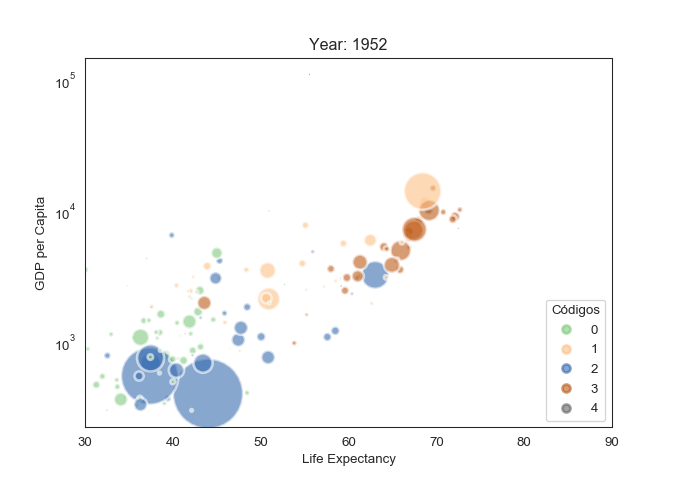

<IPython.core.display.Javascript object>


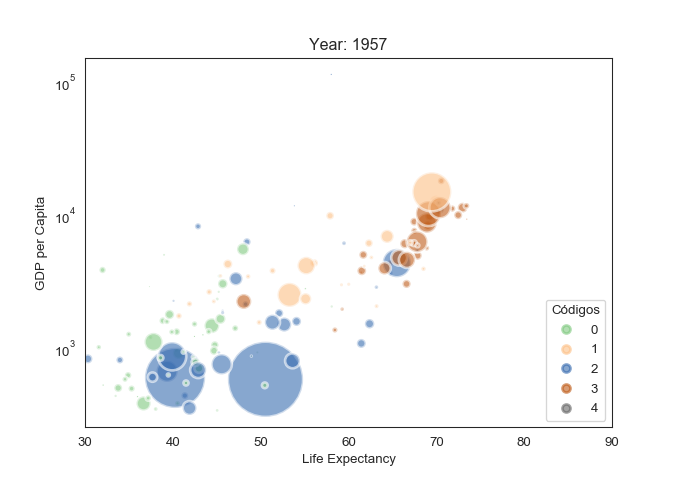

<IPython.core.display.Javascript object>


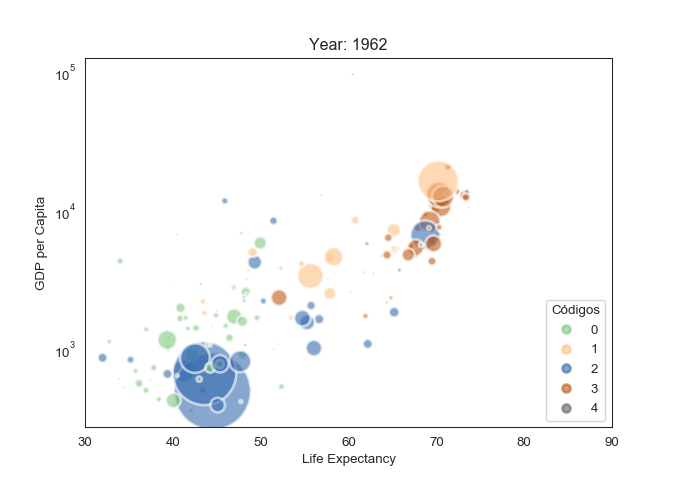

<IPython.core.display.Javascript object>


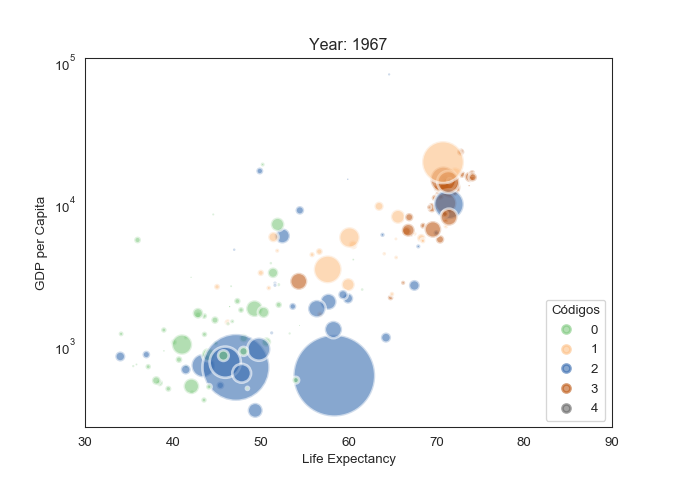

<IPython.core.display.Javascript object>


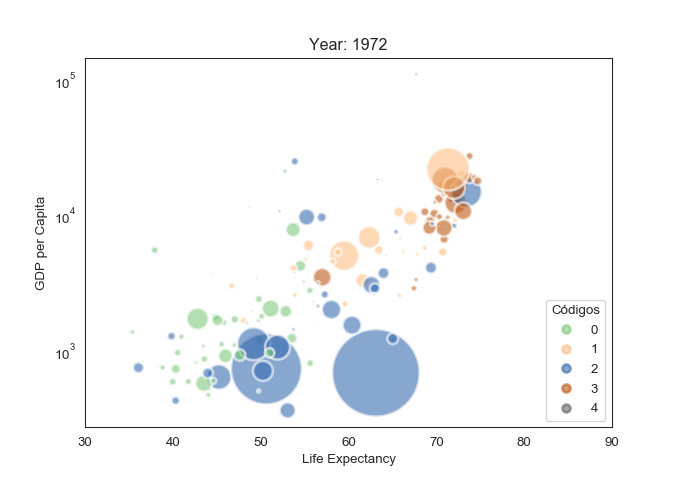

<IPython.core.display.Javascript object>


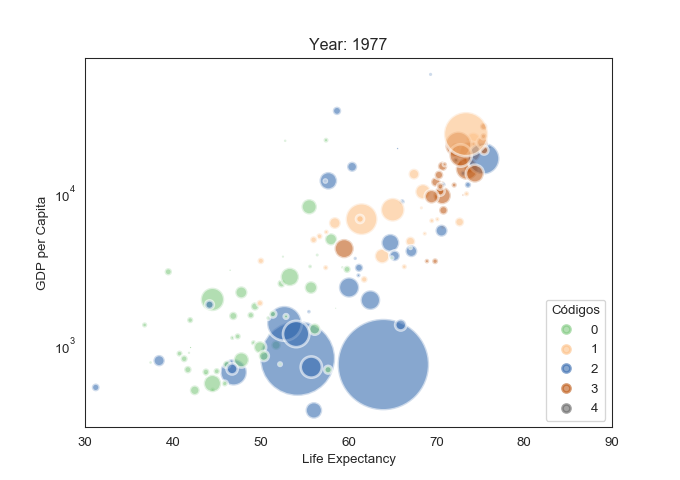

<IPython.core.display.Javascript object>


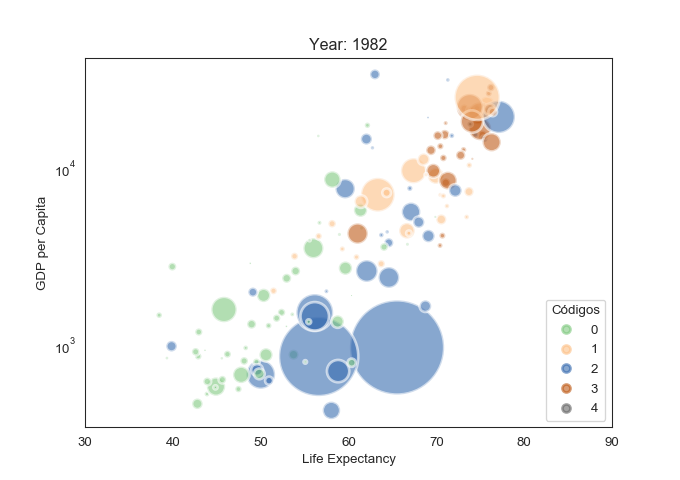

<IPython.core.display.Javascript object>


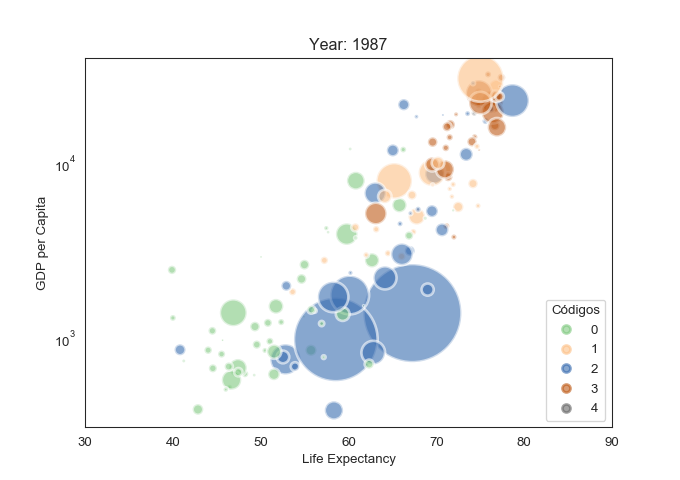

<IPython.core.display.Javascript object>


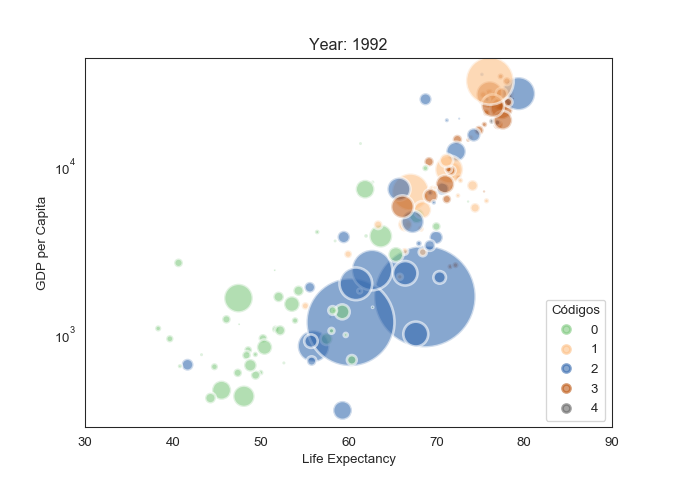

<IPython.core.display.Javascript object>


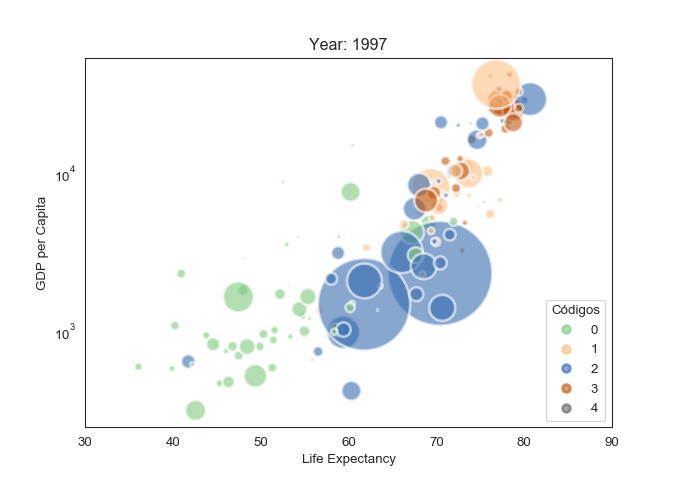

<IPython.core.display.Javascript object>


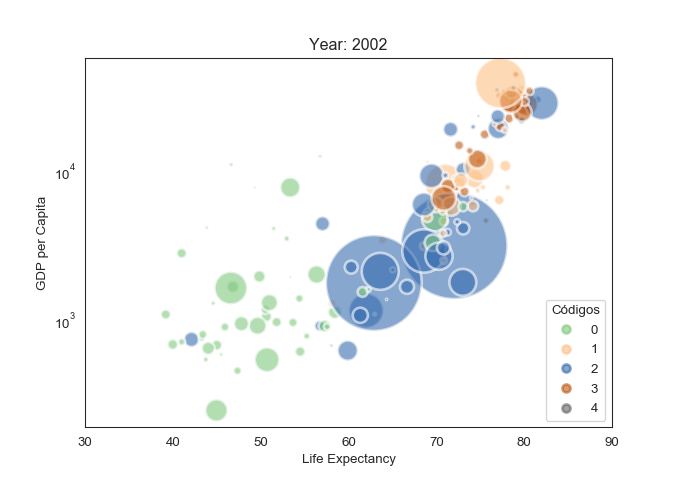

<IPython.core.display.Javascript object>


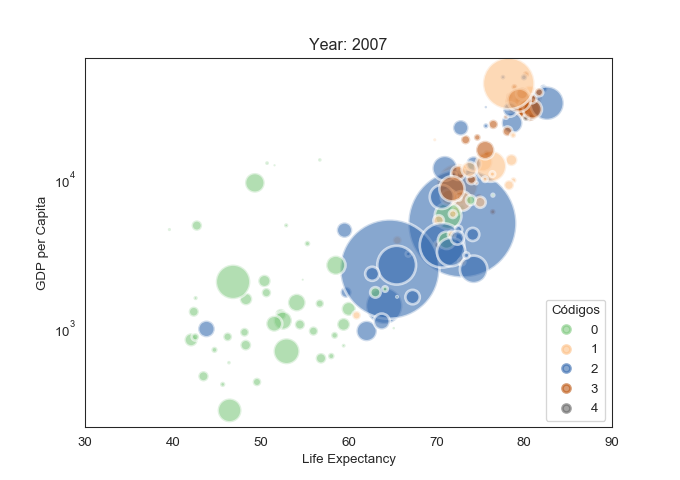

In [15]:
# Para criar gráficos interativos, usamos o comando %matplotlib notebook
%matplotlib notebook

# Para cada ano [year] dos dados:
for i in data.year.unique():
 
# Inicializar a figura, com o método .figure() criando um tamanho com base na variável my_dpi
    fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Para os diferentes anos (na variável tmp), criar um gráfico de dispersão ("scatter")
# eixo dos x: tmp['lifeExp'] -> Esperança Média de Vida
# eixo dos y: tmp['gdpPercap'] -> PIB per capita
# no parâmetro s, definimos a área da bolha consoante o tamanho populacional
# nos restantes parâmetros, definem-se as cores, opacidade, contornos e estilos de linha do gráfico
    tmp=data[ data.year == i ]
    scatter = plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
 
# Adicionar título, legendas e definir escalas e limites dos eixos
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.xlim(30, 90)
    plt.legend(*scatter.legend_elements(), loc="lower right", title="Códigos")
    
 
# Salvar as diferentes figuras que irão servir de frames para o gif animado
    filename='Gapminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

# Transformar os frames em gif, utilizando o software ImageMagick

# Usar o ImageMagick, através do interpretador de comandos Bash, com o seguinte comando
#magick convert -delay 80 Gapminder*.png animated_gapminder.gif
